## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Opening File to read

In [ ]:
fileUrl = '/content/gdrive/MyDrive/Fiverr/Turkyaljehni Extended/'
df = pd.read_csv(fileUrl+'productionProject.csv')

In [ ]:
df

,Scenarios,Production TRUNC,degree trun,distance,height,section
0,scenario 8,89%,78,20%,0,100%
1,scenario 9,73%,79,20%,10%,100%
2,scenario 10,57%,80,20%,20%,100%
3,scenario 11,51%,81,20%,30%,100%
4,scenario 12,48%,81,20%,40%,100%
...,...,...,...,...,...,...
745,scenario 1096,95%,30,200%,100%,20%
746,scenario 1097,93%,40,200%,150%,20%
747,scenario 1098,92%,47,200%,200%,20%
748,scenario 1099,91%,53,200%,250%,20%


## Delete Attributes not Required

In [ ]:
del df['Scenarios']
del df['section']

## Removing % sign from data

In [ ]:
df['Production TRUNC'] = pd.to_numeric(df['Production TRUNC'].str.replace('%', ''))
df['distance'] = pd.to_numeric(df['distance'].str.replace('%', ''))
df['height'] = pd.to_numeric(df['height'].str.replace('%', ''))

In [ ]:
df['Production TRUNC'].unique().shape

(45,)

## Details of Data Set

In [ ]:
df.describe(include='all') 

,Production TRUNC,degree trun,distance,height
count,750.000000,750.000000,750.000000,750.000000
mean,83.209333,52.204000,110.000000,96.666667
std,16.406963,19.804781,57.483962,86.980705
min,43.000000,5.000000,20.000000,0.000000
25%,75.000000,36.000000,60.000000,30.000000
50%,90.000000,53.000000,110.000000,70.000000
75%,96.000000,68.000000,160.000000,150.000000
max,100.000000,87.000000,200.000000,300.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Production TRUNC  750 non-null    int64
 1   degree trun       750 non-null    int64
 2   distance          750 non-null    int64
 3   height            750 non-null    int64
dtypes: int64(4)
memory usage: 23.6 KB


#Plots

## Histogram and Probablity Plot

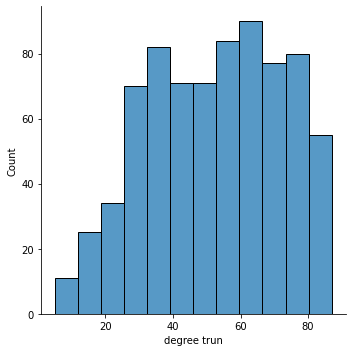

In [ ]:
sns.displot(df, x='degree trun')

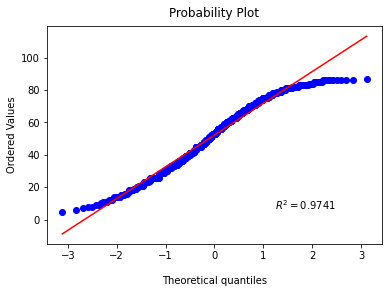

In [ ]:
import scipy.stats as stats
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution",y=1.015)
stats.probplot(df.loc[:,'degree trun'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.show()

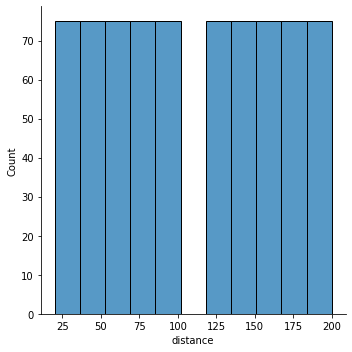

In [ ]:
sns.displot(df, x='distance')

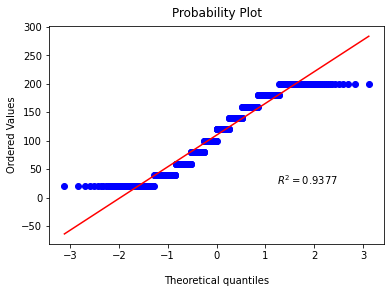

In [ ]:
import scipy.stats as stats
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution",y=1.015)
stats.probplot(df.loc[:,'distance'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.show()

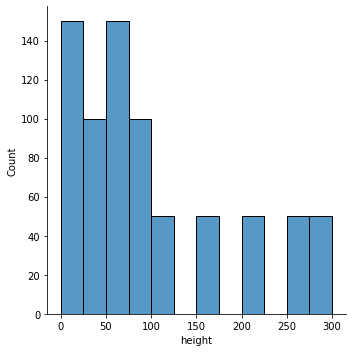

In [ ]:
sns.displot(df, x='height')

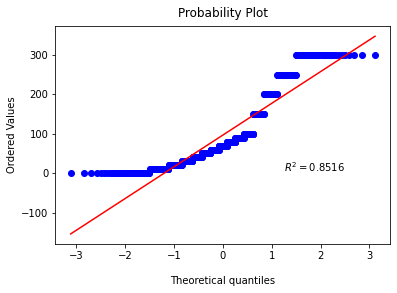

In [ ]:
import scipy.stats as stats
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution",y=1.015)
stats.probplot(df.loc[:,'height'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.show()

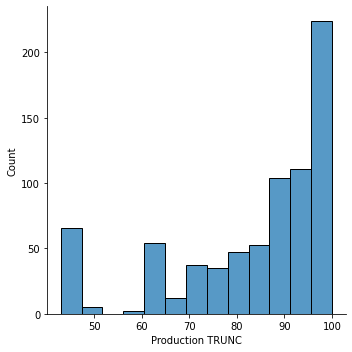

In [ ]:
sns.displot(df, x='Production TRUNC')

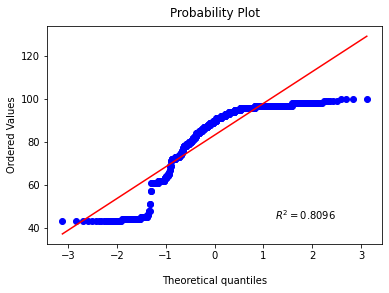

In [ ]:
import scipy.stats as stats
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution",y=1.015)
stats.probplot(df.loc[:,'Production TRUNC'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.show()

## Correlation Plots

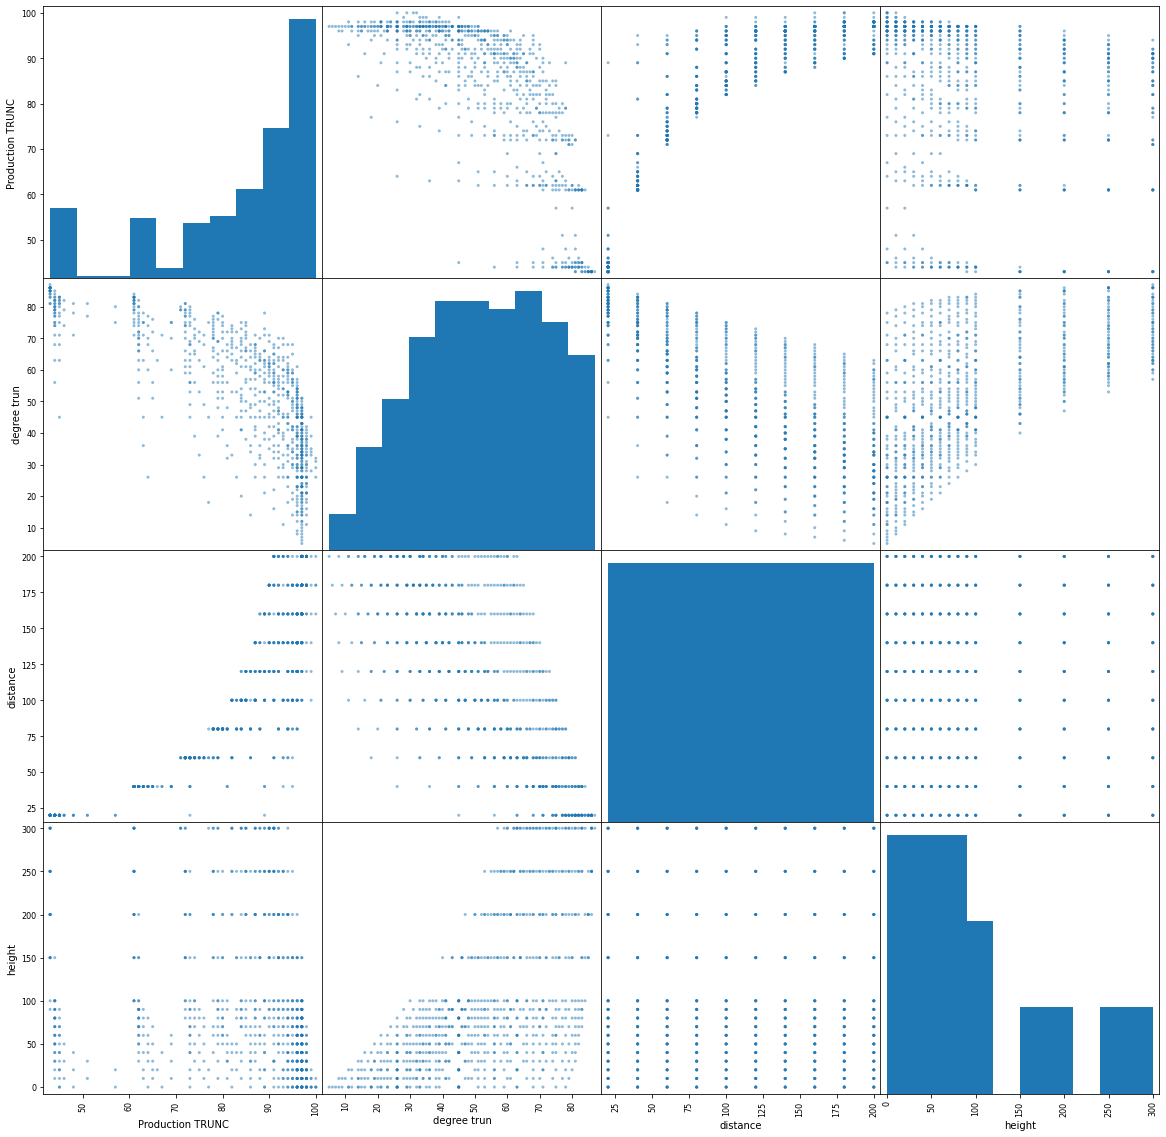

In [ ]:
scatter = pd.plotting.scatter_matrix(df, figsize=(20,20),alpha=0.5, grid=True)

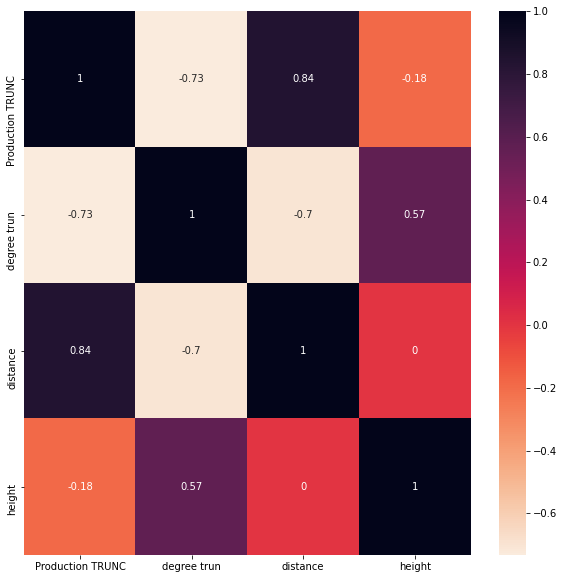

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
mask = np.tril(df.corr())
sns.heatmap(df.corr(), annot = True, ax=ax, cmap="rocket_r")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

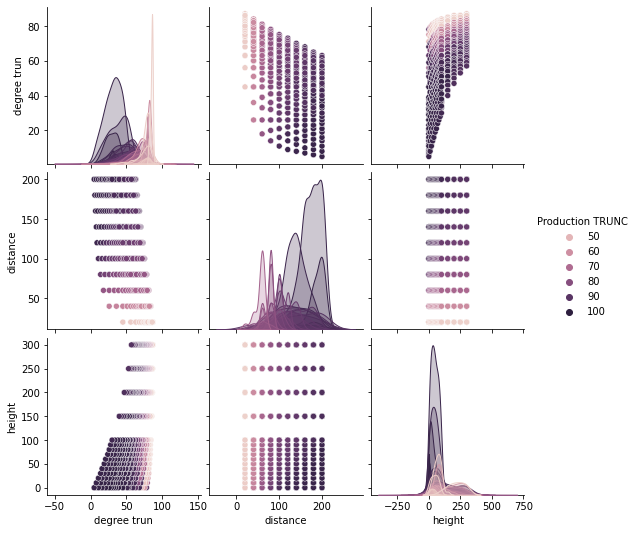

In [ ]:
sns.pairplot(df, hue="Production TRUNC")

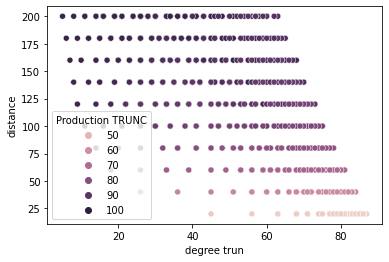

In [ ]:
sns.scatterplot(data=df, x="degree trun", y="distance" , hue="Production TRUNC")

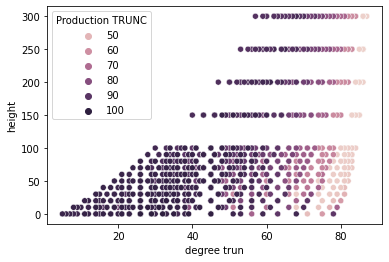

In [ ]:
sns.scatterplot(data=df, x="degree trun", y="height" , hue="Production TRUNC")

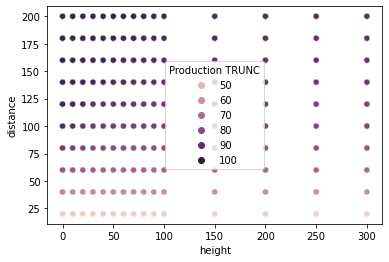

In [ ]:
sns.scatterplot(data=df, x="height", y="distance" , hue="Production TRUNC")

# Applying Regression

## Preprocessing

In [ ]:
X = df[['degree trun','distance', 'height']]
y = df['Production TRUNC']

In [ ]:
std = StandardScaler()
# X is a matrix
std.fit(X)
X_std = std.transform(X)

In [ ]:
X.head()

,degree trun,distance,height
0,78,20,0
1,79,20,10
2,80,20,20
3,81,20,30
4,81,20,40


In [ ]:
pd.DataFrame(X_std, columns=['degree trun', 'distance', 'height' ]).head()

,degree trun,distance,height
0,1.303383,-1.566699,-1.112099
1,1.353910,-1.566699,-0.997054
2,1.404436,-1.566699,-0.882010
3,1.454963,-1.566699,-0.766965
4,1.454963,-1.566699,-0.651920


## Spliting for Training and testing

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X_std,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Linear Regression Model

## Training Model

In [ ]:
lr = LinearRegression()
lr.fit(train_x, train_y)

pred_y = lr.predict(test_x)

mse = metrics.mean_squared_error(test_y, pred_y)

conclusion = pd.DataFrame({'OUTPUT': test_y, 'Prediction': pred_y, 'Absolute Error': abs(test_y - pred_y)})

## Prediction

In [ ]:
conclusion.head(10)

,OUTPUT,Prediction,Absolute Error
506,88,88.309296,0.309296
357,82,77.282577,4.717423
133,61,62.117435,1.117435
250,80,74.905805,5.094195
299,77,70.532935,6.467065
680,98,104.525177,6.525177
336,89,82.161660,6.838340
155,82,71.308382,10.691618
528,97,96.362783,0.637217
736,97,109.851483,12.851483


## Error

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred_y))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, pred_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, pred_y)))

Mean Absolute Error: 6.8702456312522315
Mean Squared Error: 79.33291892413993
Root Mean Squared Error: 8.906902880583123


# Polynomial Regression

## Training Model

In [ ]:
degree=9
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(train_x,train_y)

pred_y = polyreg.predict(test_x)

mse = metrics.mean_squared_error(test_y, pred_y)

conclusion = pd.DataFrame({'OUTPUT': test_y, 'Prediction': pred_y, 'Absolute Error': abs(test_y - pred_y)})

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=9, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

## Prediction

In [ ]:
conclusion

,OUTPUT,Prediction,Absolute Error
506,88,87.073387,0.926613
357,82,82.581181,0.581181
133,61,61.006870,0.006870
250,80,81.236786,1.236786
299,77,78.692627,1.692627
...,...,...,...
462,94,93.827427,0.172573
90,89,87.449249,1.550751
393,96,97.260490,1.260490
685,97,97.108807,0.108807


## Error

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred_y))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, pred_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, pred_y)))

Mean Absolute Error: 1.4754229736328126
Mean Squared Error: 14.164270637172933
Root Mean Squared Error: 3.763544956178009


# Ridge Regression

## Training Model

In [ ]:
ridgereg = Ridge(alpha=1e-2,normalize=True)
ridgereg.fit(train_x,train_y)

pred_y = ridgereg.predict(test_x)

mse = metrics.mean_squared_error(test_y, pred_y)

conclusion = pd.DataFrame({'OUTPUT': test_y, 'Prediction': pred_y, 'Absolute Error': abs(test_y - pred_y)})

## Prediction

In [ ]:
conclusion.head(10)

,OUTPUT,Prediction,Absolute Error
506,88,88.242954,0.242954
357,82,77.327145,4.672855
133,61,62.364435,1.364435
250,80,74.881161,5.118839
299,77,70.760441,6.239559
680,98,104.189899,6.189899
336,89,82.178064,6.821936
155,82,71.267165,10.732835
528,97,96.158992,0.841008
736,97,109.829001,12.829001


## Error

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred_y))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, pred_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, pred_y)))

Mean Absolute Error: 6.8534790018623335
Mean Squared Error: 79.28114001311855
Root Mean Squared Error: 8.90399573299081


# Lasso Regression Model

## Training Model

In [ ]:
lassoreg = Lasso(alpha=1e-2,normalize=True, max_iter=1e5)
lassoreg.fit(train_x,train_y)

pred_y = lassoreg.predict(test_x)

mse = metrics.mean_squared_error(test_y, pred_y)

conclusion = pd.DataFrame({'OUTPUT': test_y, 'Prediction': pred_y, 'Absolute Error': abs(test_y - pred_y)})

## Prediction

In [ ]:
conclusion.head(10)

,OUTPUT,Prediction,Absolute Error
506,88,88.307256,0.307256
357,82,77.626008,4.373992
133,61,62.964989,1.964989
250,80,74.920285,5.079715
299,77,71.424607,5.575393
680,98,103.794816,5.794816
336,89,82.100809,6.899191
155,82,71.198504,10.801496
528,97,95.824760,1.175240
736,97,109.459283,12.459283


## Error

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred_y))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, pred_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, pred_y)))

Mean Absolute Error: 6.818992439450702
Mean Squared Error: 79.03455539613331
Root Mean Squared Error: 8.890138097697545
